In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# S&P index from 2013
# https://www.nasdaq.com/market-activity/index/spx/historical
# csv_file = 'blob:https://www.nasdaq.com/b88f9de1-47b1-4050-861d-140af8d5354d'
csv_file = '/mnt/notebooks/data/spx.csv'

df = pd.read_csv(csv_file, encoding='cp1252', usecols=['Date', 'Close/Last'])

In [19]:
df.head()

,Date,Close/Last
0,07/24/2023,4554.64
1,07/21/2023,4536.34
2,07/20/2023,4534.87
3,07/19/2023,4565.72
4,07/18/2023,4554.98


In [20]:
df.rename(columns={'Close/Last': 'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_values(by='Date', ascending=True, inplace=True)
df.head()

,Price
Date,
2013-07-25,1690.25
2013-07-26,1691.65
2013-07-29,1685.33
2013-07-30,1685.96
2013-07-31,1685.73


In [23]:
#df_monthly_average = df.resample('M').mean()
#df_monthly_delta = df['Price'].pct_change()
#df_monthly_delta = df['Price'].pct_change(periods=12)
#df_monthly_delta = df.resample('M').mean() # so we can compare diff over last 12 months...
df_monthly_delta = df.resample('Y').mean() # so we can compare diff over last 12 months...
df_monthly_delta.head()

,Price
Date,
2013-12-31,1731.514737
2014-12-31,1931.576130
2015-12-31,2060.939693
2016-12-31,2094.651310
2017-12-31,2449.076375


In [24]:
#df_monthly_delta.pct_change(periods=12)
df_monthly_delta.pct_change()

,Price
Date,
2013-12-31,NaN
2014-12-31,0.115541
2015-12-31,0.066973
2016-12-31,0.016357
2017-12-31,0.169205
2018-12-31,0.121326
2019-12-31,0.060863
2020-12-31,0.104518
2021-12-31,0.328029


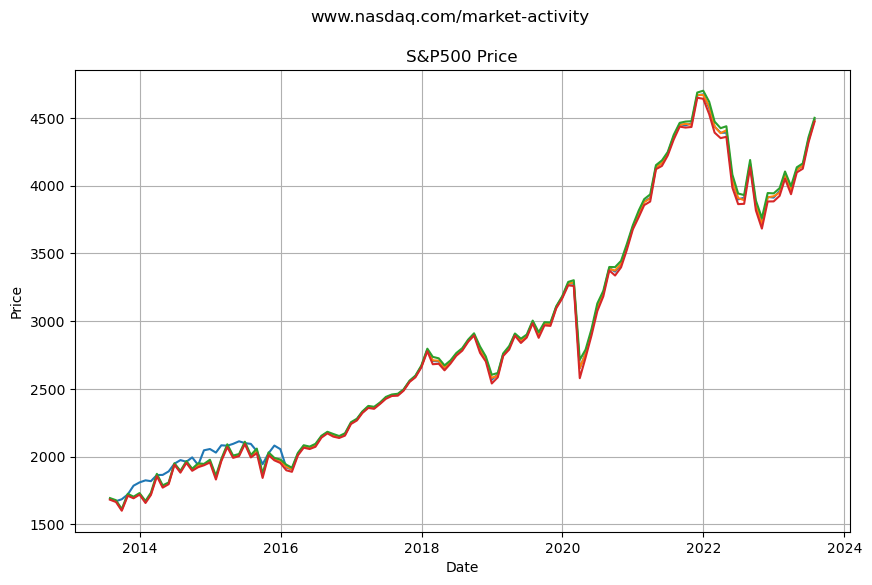

In [17]:
plt.figure(figsize=(10, 6))
#plt.plot(df_monthly_average.index, df_monthly_average['Price'])
plt.plot(df_monthly_delta.index, df_monthly_delta)
plt.xlabel('Date')
plt.ylabel('Price')
plt.suptitle('www.nasdaq.com/market-activity')
plt.title('S&P500 Price')
plt.grid(True)
plt.show()